In [15]:
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [44]:
sourcefolder = './task1-data-part1/'
savefoldeer = './Sveta_test/'
sfiles = os.listdir(sourcefolder)
print(len(sfiles))
filename = sourcefolder +'F2_1_1_1.ts' # sfiles[0]
print(sfiles[0])

28
F1_2_2_1.ts


0 255


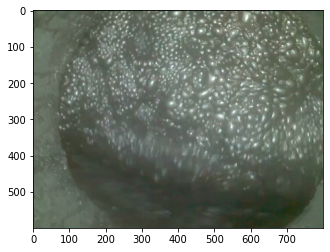

In [45]:
vidcap = cv2.VideoCapture(filename)
success,images = vidcap.read()
plt.imshow(images)
print(images.min(), images.max())

12 255


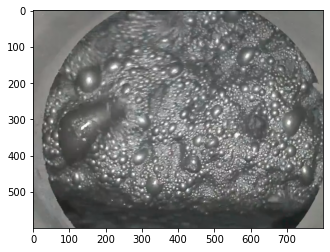

In [114]:
success,images = vidcap.read()
plt.imshow(images)
print(images.min(), images.max())

20 255


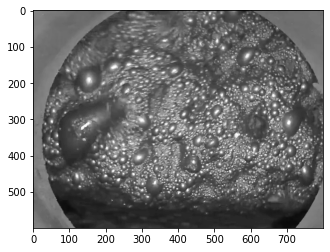

In [116]:
imageg = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
plt.imshow(imageg,cmap='gray')
print(imageg.min(), imageg.max())

mean = 111, median = 109


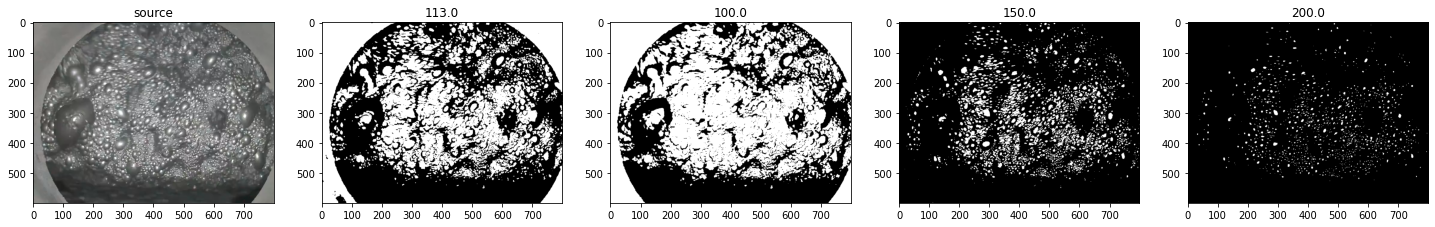

In [6]:
plt.figure(figsize=(25,20))
plt.subplot(1,5,1)
plt.imshow(images)
plt.title('source')
plt.subplot(1,5,2)
threshold, imageb = cv2.threshold(imageg,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(imageb,cmap='gray')
plt.title(threshold)
plt.subplot(1,5,3)
threshold, imageb = cv2.threshold(imageg,100,255,0)
plt.imshow(imageb,cmap='gray')
plt.title(threshold)
plt.subplot(1,5,4)
threshold, imageb = cv2.threshold(imageg,150,255,0)
plt.imshow(imageb,cmap='gray')
plt.title(threshold)
plt.subplot(1,5,5)
threshold, imageb = cv2.threshold(imageg,200,255,0)
plt.imshow(imageb,cmap='gray')
plt.title(threshold)
print('mean = {:.0f}, median = {:.0f}'.format(imageg.mean(), np.median(imageg)))

min = 0.18, max = 2.34 mean = 1.01, median = 1.00, std*3 = 0.99
[0.         2.33944954]


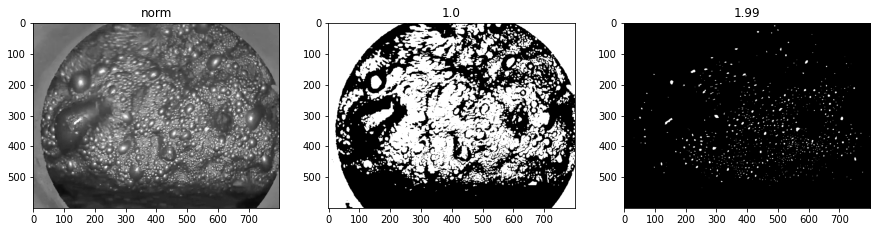

In [117]:
plt.figure(figsize=(15,5))

imagen = imageg / np.median(imageg)
plt.subplot(1,3,1)
plt.imshow(imagen, cmap='gray')
plt.title('norm')

plt.subplot(1,3,2)
threshold, imaget = cv2.threshold(imagen, np.median(imagen), imagen.max(), 0)
plt.imshow(imaget,cmap='gray')
plt.title(threshold)

plt.subplot(1,3,3)
threshold, imaget = cv2.threshold(imagen, np.median(imagen) + np.std(imagen) * 3, imagen.max(), 0)
plt.imshow(imaget,cmap='gray')
plt.title('{:.2f}'.format(threshold))

print('min = {:.2f}, max = {:.2f}'.format(imagen.min(), imagen.max()),
        'mean = {:.2f}, median = {:.2f}, std*3 = {:.2f}'.format(np.mean(imagen), np.median(imagen),
                                                                np.std(imagen) * 3)
     )
print(np.unique(imaget))

[0 1]


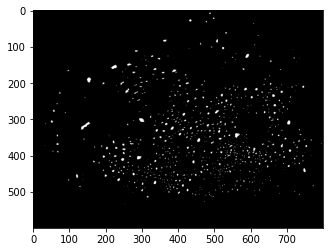

In [118]:
imageb = imaget.astype(bool).astype('uint8')
plt.imshow(imageb, cmap='gray')
print(np.unique(imageb))

найдено контуров: 790, сохранено контуров: 790
[8.5, 315, 513] [[314 314 315 317 318 318 316 315]
 [512 514 515 515 514 513 513 512]]


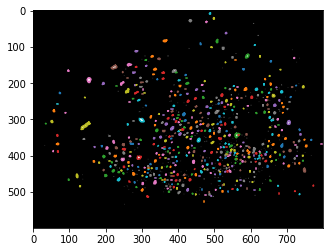

In [119]:
plt.imshow(imageb, cmap='gray')
contours, hierarchy = cv2.findContours(imageb.copy(),
                                       cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
Bounds = []
Features = [] # [площадь, x, y]
for contour in contours:
    # площадь > 0 
    M = cv2.moments(contour)
    if M['m00'] > 0:
        Features.append([M['m00'], int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])])
        Bounds.append(np.vstack((contour[:,0, 0], contour[:,0, 1])))
    else:
        Features.append([1, contour[:,0,0][0], contour[:,0,1][0]])
        Bounds.append(np.vstack((contour[:,0, 0], contour[:,0, 1])))    
    plt.plot(Bounds[-1][0],Bounds[-1][1])
print('найдено контуров: {:.0f}, сохранено контуров: {:.0f}'.format(len(contours), len(Bounds)))
print(Features[3], Bounds[3])

In [115]:
Bounds1 = Bounds
Features1 = Features

In [121]:
Bounds2 = Bounds
Features2 = Features

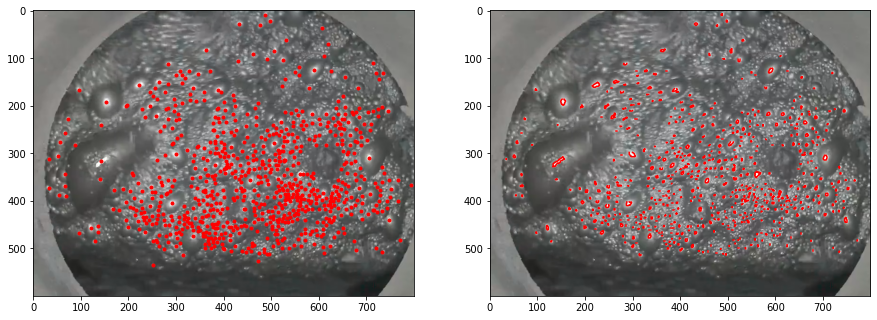

In [120]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(images)
for feats in Features:
    plt.plot(feats[1], feats[2], 'r.')
plt.subplot(1,2,2)
plt.imshow(images)
for ibound in Bounds:
    plt.plot(ibound[0],ibound[1], 'r')

In [ ]:
Features1 Features2

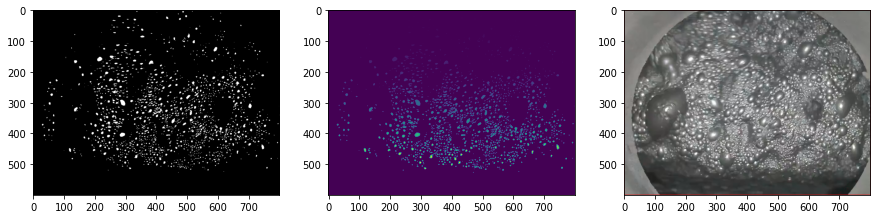

In [89]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
threshold, imaget = cv2.threshold(imagen, np.mean(imagen) + np.std(imagen) * 2, imagen.max(), 0)
imageb = imaget.astype(bool).astype('uint8')
plt.imshow(imageb,cmap='gray')
imagem = images
unknown = cv2.subtract(imageg,imageb)
ret, markers = cv2.connectedComponents(imageb)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(imagem, markers)
plt.subplot(1,3,2)
plt.imshow(markers)
imagem[markers == -1] = [255,0,0]
plt.subplot(1,3,3)
plt.imshow(imagem)

In [123]:
from scipy import ndimage

Text(0.5, 1.0, 'Sobel')

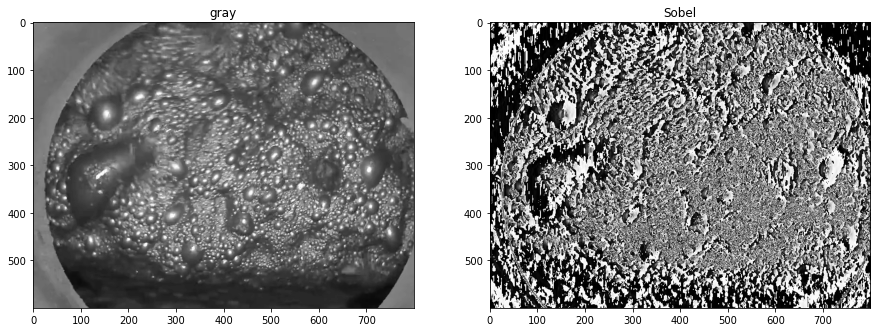

In [158]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(imageg,cmap='gray')
plt.title('gray')
plt.subplot(1,2,2)
result = ndimage.sobel(imageg)
plt.imshow(result,cmap='gray')
plt.title('Sobel')

172.13474


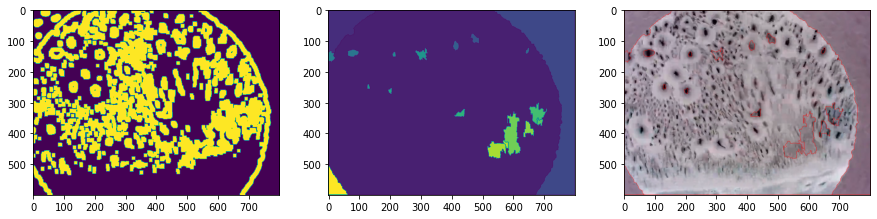

In [113]:
#img = cv2.imread('/home/jovyan/frames_F2_2_2_2/frame99.jpg')
img = cv2.bitwise_not(cv2.imread('/home/jovyan/frames_F2_2_2_2/frame99.jpg')) # инверсия
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
print(dist_transform.max())
ret, sure_fg = cv2.threshold(dist_transform,0.07*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(unknown)
plt.subplot(1,3,2)
plt.imshow(markers)
plt.subplot(1,3,3)
plt.imshow(img)

min = 0.27, max = 2.42 mean = 1.04, median = 1.00, std*3 = 0.91


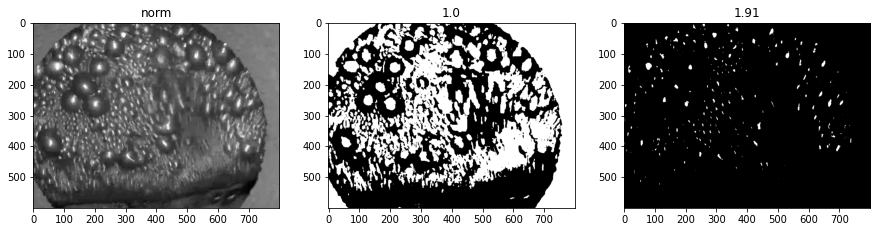

In [112]:
image = cv2.imread("/home/jovyan/frames_F2_2_2_2/frame99.jpg")
imageg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,5))

imagen = imageg / np.median(imageg)
plt.subplot(1,3,1)
plt.imshow(imagen, cmap='gray')
plt.title('norm')

plt.subplot(1,3,2)
threshold, imageb = cv2.threshold(imagen, np.median(imagen), imagen.max(), 0)
plt.imshow(imageb,cmap='gray')
plt.title(threshold)

plt.subplot(1,3,3)
threshold, imageb = cv2.threshold(imagen, np.median(imagen) + np.std(imagen) * 3, imagen.max(), 0)
plt.imshow(imageb,cmap='gray')
plt.title('{:.2f}'.format(threshold))

print('min = {:.2f}, max = {:.2f}'.format(imagen.min(), imagen.max()),
        'mean = {:.2f}, median = {:.2f}, std*3 = {:.2f}'.format(np.mean(imagen), np.median(imagen),
                                                                np.std(imagen) * 3)
     )

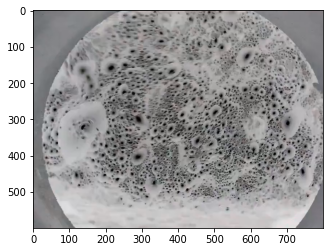

In [72]:
plt.imshow(cv2.bitwise_not(images))

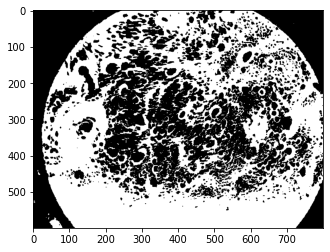

In [73]:
threshold, imageib = cv2.threshold(cv2.cvtColor(cv2.bitwise_not(images), cv2.COLOR_BGR2GRAY),
                                   0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(imageib,cmap='gray')

## круги и элипсы

In [46]:
image = images

In [31]:
vidcap = cv2.VideoCapture('/home/jovyan/task1-data-part1/F2_2_2_2.ts')
success,image = vidcap.read()

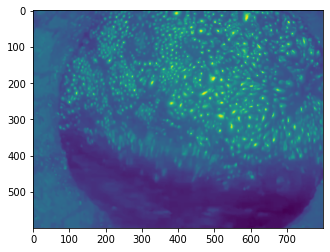

In [47]:
image_gaussian = cv2.GaussianBlur(image,(5,5),0)
image_gray = cv2.cvtColor(image_gaussian, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

Threshold - 160


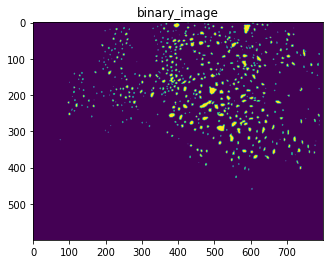

In [48]:
#Image binaryzation
image_binary = None
threshold, image_binary = cv2.threshold(image_gray,160,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
print("Threshold - %d" % threshold)

plt.imshow(image_binary)
plt.title('binary_image')
plt.show()

Total centroids 551


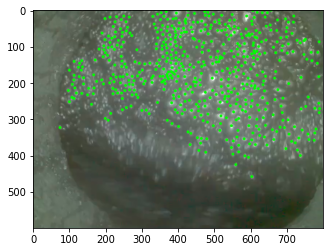

In [49]:
count, labels, stats, centroids = cv2.connectedComponentsWithStats(image_binary)

circled_image = cv2.cvtColor(image_binary, cv2.COLOR_GRAY2RGB)

image_copy = image.copy()
bound_size = 6

small_images = []
for i in range(1,count):
    #print(stats[i])
    image_copy = cv2.circle(image_copy, (int(centroids[i,0]), int(centroids[i,1])), 1, (0, 255, 0), 5)
    small_images.append(image_copy[max(0,int(centroids[i, 1] - bound_size * abs(centroids[i, 1] - stats[i, 1]))) : 
                                   int(centroids[i, 1] + bound_size * abs(centroids[i, 1] - stats[i, 1])), 
                                   max(0,int(centroids[i, 0] - bound_size*abs(stats[i, 0]-centroids[i, 0]))) : 
                                   int(centroids[i, 0] + bound_size*abs(stats[i, 0]-centroids[i, 0]))])
print("Total centroids %d" % len(centroids))

plt.imshow(image_copy)
plt.show()

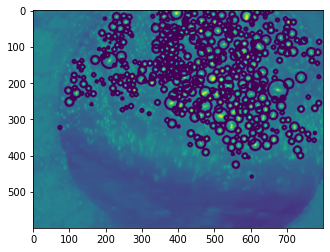

In [51]:
new_gray = image_gray.copy()
for i in range(len(small_images)):#range(148, 150):#range(len(small_images)):
    try:
        small_image = small_images[i]
        sobel_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY)
        scale = 1
        delta = 0
        ddepth = cv2.CV_16S
        grad_x = cv2.Sobel(sobel_image, ddepth, 1, 0, ksize=7, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
        size = np.mean(longest_subsequence(grad_x[grad_x.shape[0]//2]))
        #print(size)
        new_gray = cv2.circle(new_gray, (int(centroids[i+1,0]), int(centroids[i+1,1])), int(size), (0, 255, 0), 5)
    except:
        continue
plt.imshow(new_gray)
plt.show()

In [39]:
def longest_subsequence(sequence):
    max_neg = 0
    max_pos = 0
    curr_neg = 0
    curr_pos = 0
    #print(sequence)
    for i in range(len(sequence)):
        if sequence[i] <= -20:
            curr_neg += 1
            if curr_neg > max_neg:
                max_neg = curr_neg
            curr_pos = 0
        elif sequence[i] >= 20:
            curr_pos += 1
            if curr_pos > max_pos:
                max_pos = curr_pos
            curr_neg = 0
        else:
            curr_pos += 1
            if curr_pos > max_pos:
                max_pos = curr_pos
            curr_neg = 0
            
    return max_neg, max_pos


import math
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

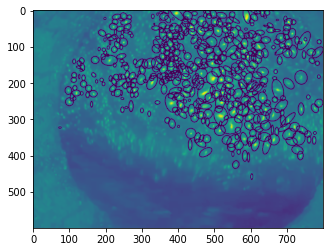

In [52]:
new_gray = image_gray.copy()
scale = 1
delta = 0
ddepth = cv2.CV_16S

for i in range(len(small_images)):#range(150, 151):#range(len(small_images)):#range(148, 150):#range(len(small_images)):
    #print(i)
    try:
        small_image = small_images[i]
        sobel_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY)
        points = []
        max_angle = 0
        max_size = 0
        max_size2 = 0

        for j in range(0,13):
            rotated_image = rotate_image(sobel_image, 15*j)
            rotated_small_image = rotate_image(small_image, 15*j)
            
            grad_x = cv2.Sobel(rotated_image, ddepth, 1, 0, ksize=7, scale=scale, 
                               delta=delta, borderType=cv2.BORDER_DEFAULT)
            grad_y = cv2.Sobel(rotated_image, ddepth, 0, 1, ksize=7, scale=scale, 
                               delta=delta, borderType=cv2.BORDER_DEFAULT)
            size = np.mean(longest_subsequence(grad_x[grad_x.shape[0]//2]))
            size2 = np.mean(longest_subsequence(grad_y.T[grad_y.shape[1]//2]))
            #print((15*j, size, size2))
            if size > max_size:
                max_size = size
                max_angle = 15*j
                max_size2 = size2
    
        #print(int(max_angle))        
      
        new_gray = cv2.ellipse(new_gray, (int(centroids[i+1,0]), int(centroids[i+1,1])), 
                               (int(max_size), int(max_size2)), 180+max_angle, 0, 360, (0,255,0), 2)
    except:
        continue
plt.imshow(new_gray)
plt.show()

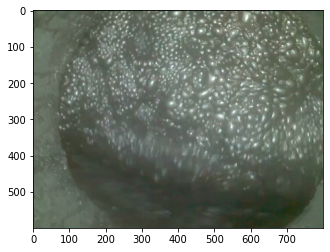

In [53]:
plt.imshow(image)
plt.show()